### Table of Contents
- [Goals](#goals)
- [Data](#data)
    - [Loading the Data](#data_1)
    - [Data Information](#data_2)
- [Data Cleaning](#cleaning)
- [Exploratory Data Analysis](#EDA)
    - [Overview](#EDA_1)
    - [Geographic Patterns](#EDA_2)
    - [Artist Performance](#EDA_3)
    - [Platform Behaviour](#EDA_4)
    - [Genre-Based Insights](#EDA_5)
- [Conclusion](#conclusion)
    

### Goals <a class="anchor" id="Goals"></a>
This notebook contains an analysis on data regarding the top 500 streamed songs on Spotify globally. The goal for this project is to do the following:

- Get acquainted with the data
- Clean the data so it is ready for analysis
- Develop some questions for analysis
- Analyse variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="data"></a>
The data for this project was downloaded from Kaggle:

https://www.kaggle.com/datasets/atharvasoundankar/spotify-global-streaming-data-2024/data

Information regarding the features of the data is located on the `Column` section and includes units in between parentheses when necessary.

#### Loading the Data <a class="anchor" id="data_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from Spotify_2024_Global_Streaming_Data.csv and preview the first five rows of the DataFrame.

In [5]:
# set up imports etc
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

In [6]:
# read csv file and print first 5 rows
spotify_data = pd.read_csv("Spotify_2024_Global_Streaming_Data.csv")
spotify_data.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2022,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


#### Data Information <a class="anchor" id="data_2"></a>
Insights:
- There are 12 columns and 500 rows.
- There is no missing data in any column.
- There are 5 columns with text data (object), 6 with rational numbers (float), and 1 with integers to indicate the release year. 
- Basic summary statistics for the numerical data columns.


In [8]:
# .columns
spotify_data.columns

Index(['Country', 'Artist', 'Album', 'Genre', 'Release Year',
       'Monthly Listeners (Millions)', 'Total Streams (Millions)',
       'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)',
       'Platform Type', 'Streams Last 30 Days (Millions)', 'Skip Rate (%)'],
      dtype='object')

In [9]:
# .info()
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

In [82]:
# .duplicated.sum()
spotify_data.duplicated().sum()

0

In [10]:
# .isnull().sum()
spotify_data.isnull().sum()

Country                            0
Artist                             0
Album                              0
Genre                              0
Release Year                       0
Monthly Listeners (Millions)       0
Total Streams (Millions)           0
Total Hours Streamed (Millions)    0
Avg Stream Duration (Min)          0
Platform Type                      0
Streams Last 30 Days (Millions)    0
Skip Rate (%)                      0
dtype: int64

In [11]:
# .describe()
spotify_data.describe()

,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Streams Last 30 Days (Millions),Skip Rate (%)
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2020.488000,51.04122,2581.154080,8954.368880,3.520640,99.048500,20.370460
std,1.671959,28.23801,1416.055972,5167.648272,0.571431,57.533452,10.597202
min,2018.000000,1.01000,53.560000,184.300000,2.510000,2.850000,1.160000
25%,2019.000000,27.67250,1337.337500,4322.097500,3.030000,48.057500,11.152500
50%,2020.000000,50.82500,2697.355000,9053.665000,3.540000,101.465000,20.820000
75%,2022.000000,75.09500,3798.197500,12690.180000,4.000000,148.410000,28.760000
max,2023.000000,99.80000,4985.540000,21874.920000,4.490000,200.000000,39.970000


### Data Cleaning <a class="anchor" id="cleaning"> </a>
There seem to be no outliers in any of the numerical data, as can be seen from the boxplots.

There are also no spelling mistakes in the remaining text data.

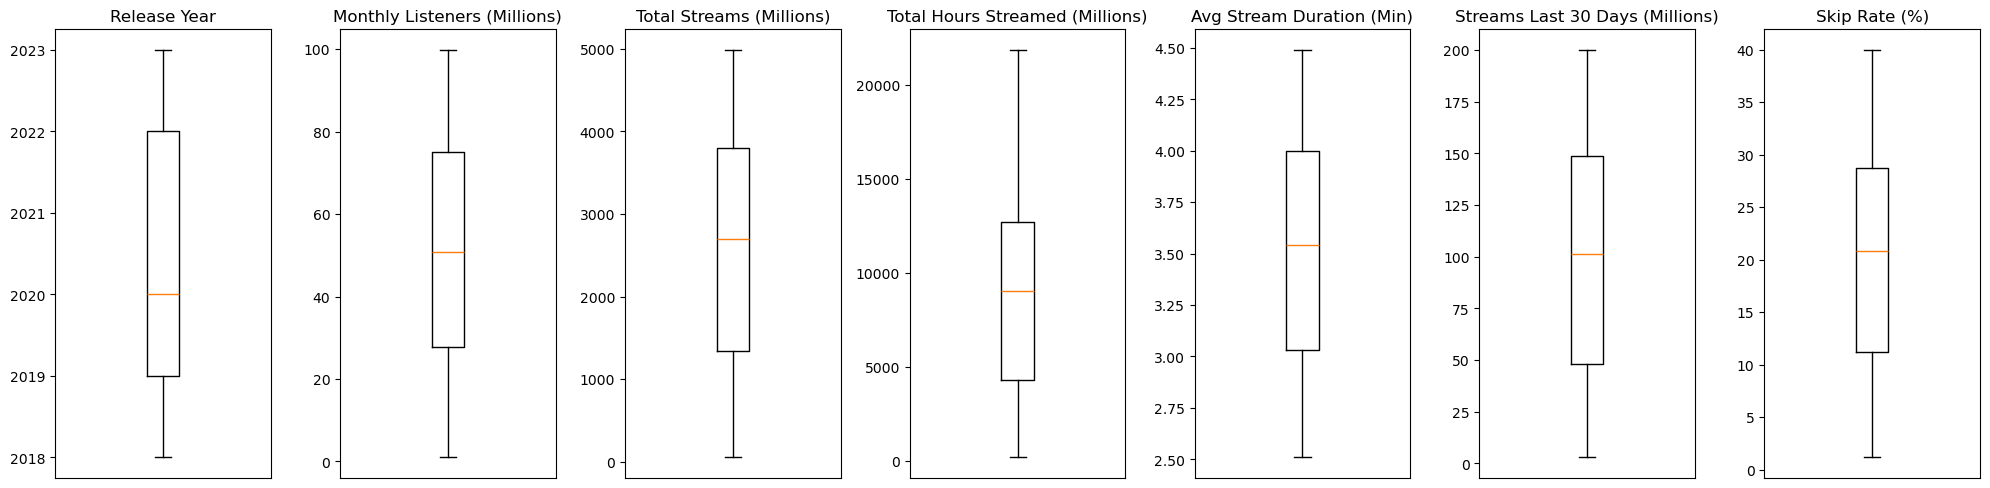

In [13]:
# Check for outliers in numerical data
num_column_names = np.concatenate((spotify_data.columns[4:9], spotify_data.columns[10:12]))
# print(num_column_names)
fig, axs = plt.subplots(1, len(num_column_names), figsize=(20,5))
for i in range(len(num_column_names)):
    axs[i].boxplot(spotify_data[num_column_names[i]])
    axs[i].set_title(num_column_names[i])
    axs[i].set_xticks([])
plt.tight_layout()
plt.show()

In [14]:
# Check how many countries, how many genres, how many platform types
no_num_column_names = np.concatenate((spotify_data.columns[0:4], spotify_data.columns[9:10]))
for i in range(len(no_num_column_names)):
    print(no_num_column_names[i] + ": ", spotify_data[no_num_column_names[i]].nunique())
    print(spotify_data[no_num_column_names[i]].unique())

Country:  20
['Germany' 'Brazil' 'United States' 'Italy' 'Sweden' 'France'
 'United Kingdom' 'Argentina' 'South Korea' 'South Africa' 'Australia'
 'Netherlands' 'India' 'Canada' 'Mexico' 'Spain' 'Japan' 'Indonesia'
 'Russia' 'Turkey']
Artist:  15
['Taylor Swift' 'The Weeknd' 'Post Malone' 'Ed Sheeran' 'Billie Eilish'
 'Bad Bunny' 'Doja Cat' 'Ariana Grande' 'Dua Lipa' 'BLACKPINK' 'SZA'
 'Karol G' 'BTS' 'Drake' 'Olivia Rodrigo']
Album:  15
["1989 (Taylor's Version)" 'After Hours' 'Austin' 'Autumn Variations'
 'Happier Than Ever' 'Nadie Sabe Lo Que Va a Pasar Mañana' 'Scarlet'
 'Eternal Sunshine' 'Future Nostalgia' 'BORN PINK' 'SOS'
 'MAÑANA SERÁ BONITO' 'Proof' 'For All The Dogs' 'Guts']
Genre:  10
['K-pop' 'R&B' 'Reggaeton' 'Indie' 'Rock' 'Pop' 'Jazz' 'Hip Hop' 'EDM'
 'Classical']
Platform Type:  2
['Free' 'Premium']


### Exploratory Data Analysis <a class="anchor" id="EDA"></a>
Each subsection tackles 3 questions which fit in to the subsection title. These subsections are titled:
- Overview
- Countries
- Artists
- Platforms
- Genres

#### Overview <a class="anchor" id="EDA_1"></a>
Goal: Understand the overall landscape of Spotify streaming data.

Questions:
- What is the ranking of albums by total streams?
- Is there a relationship between the average stream duration and the total hours streamed?
- Do any of the numerical variables show correlation?

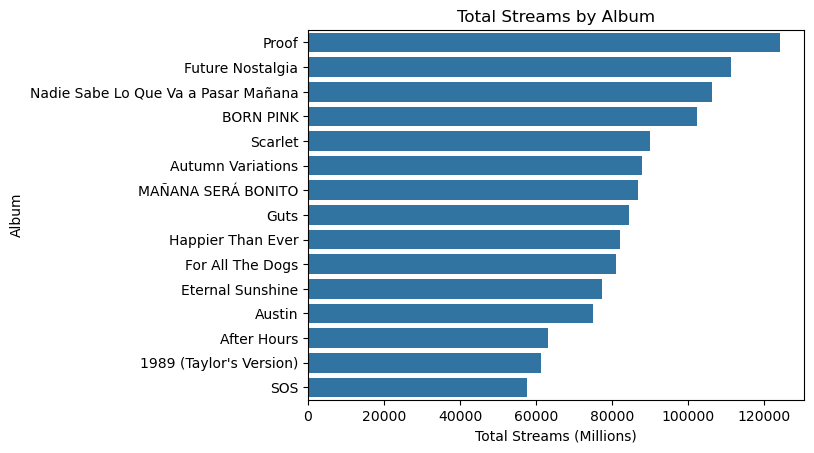

In [17]:
### Total streams across albums
# group data by album & sum total streams
album_streams = spotify_data.groupby("Album")["Total Streams (Millions)"].sum().sort_values(ascending=False)
# bar chart
plt.figure()
sns.barplot(x=album_streams.values, y=album_streams.index)
plt.title("Total Streams by Album")
plt.xlabel("Total Streams (Millions)")
plt.show()

The range of total streams per album is roughly from 60,000 million to 120,000 million. Out of these, the only albums to surpass 100,000 million streams are the top four:
1. _Proof_ by _BTS_
2. _Future Nostalgia_ by _Dua Lipa_
3. _Nadie Sabe Lo Que Va a Pasar Mañana_ by _Bad Bunny_
4. _BORN PINK_ by _BLACKPINK_

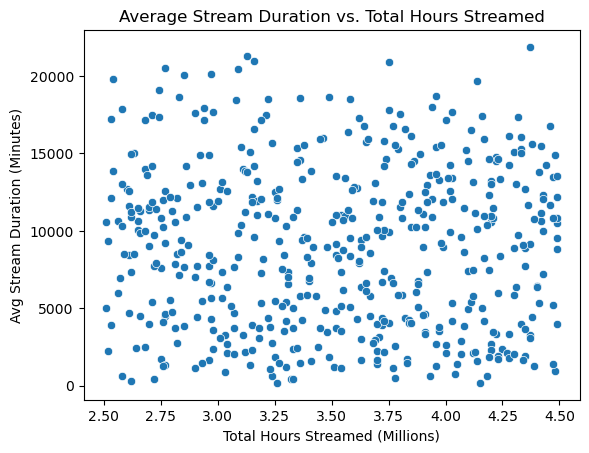

Correlation:  -0.02


In [19]:
### Relationship between avg stream duration and total hours streamed
plt.figure()
sns.scatterplot(x = spotify_data["Avg Stream Duration (Min)"], y = spotify_data["Total Hours Streamed (Millions)"])
plt.title("Average Stream Duration vs. Total Hours Streamed")
plt.xlabel("Total Hours Streamed (Millions)")
plt.ylabel("Avg Stream Duration (Minutes)")
plt.show()
correlation = spotify_data["Avg Stream Duration (Min)"].corr(spotify_data["Total Hours Streamed (Millions)"])
print("Correlation: ", round(correlation, 2))

A neglibible correlation was found (-0.02) between the average stream duration and the total hours streamed.

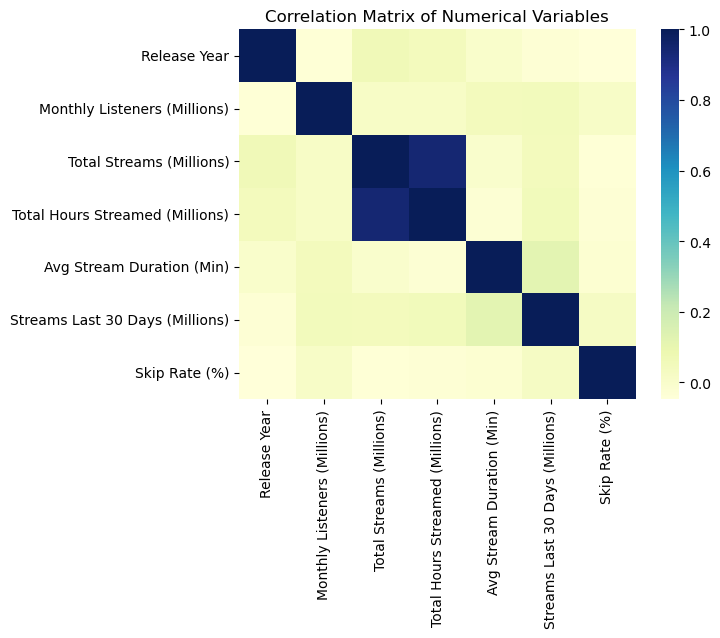

Total Hours Streamed (Millions)  Total Streams (Millions)           0.940712
Total Streams (Millions)         Total Hours Streamed (Millions)    0.940712
dtype: float64


In [21]:
### Correlation of numerical variables
plt.figure()
sns.heatmap(spotify_data[num_column_names].corr(), cmap="YlGnBu")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()
corr_pairs = spotify_data[num_column_names].corr().unstack().sort_values(key=lambda x: abs(x), ascending=False)
significant_corrs = corr_pairs[(abs(corr_pairs) > 0.2) & (corr_pairs != 1.0)]
print(significant_corrs)

The only pairs that seem to have correlation are the Total Streams (Millions) and the Total Hours Streamed (Millions), with a strong correlation of 0.94.

#### Countries <a class="anchor" id="EDA_2"></a>
Goal: Explore how music consumption patterns vary across countries.

Questions:
- Which countries contribute the most to global streams, to monthly listeners, and to streams in the last 30 days?
- How do skip rates and album release years vary by country?

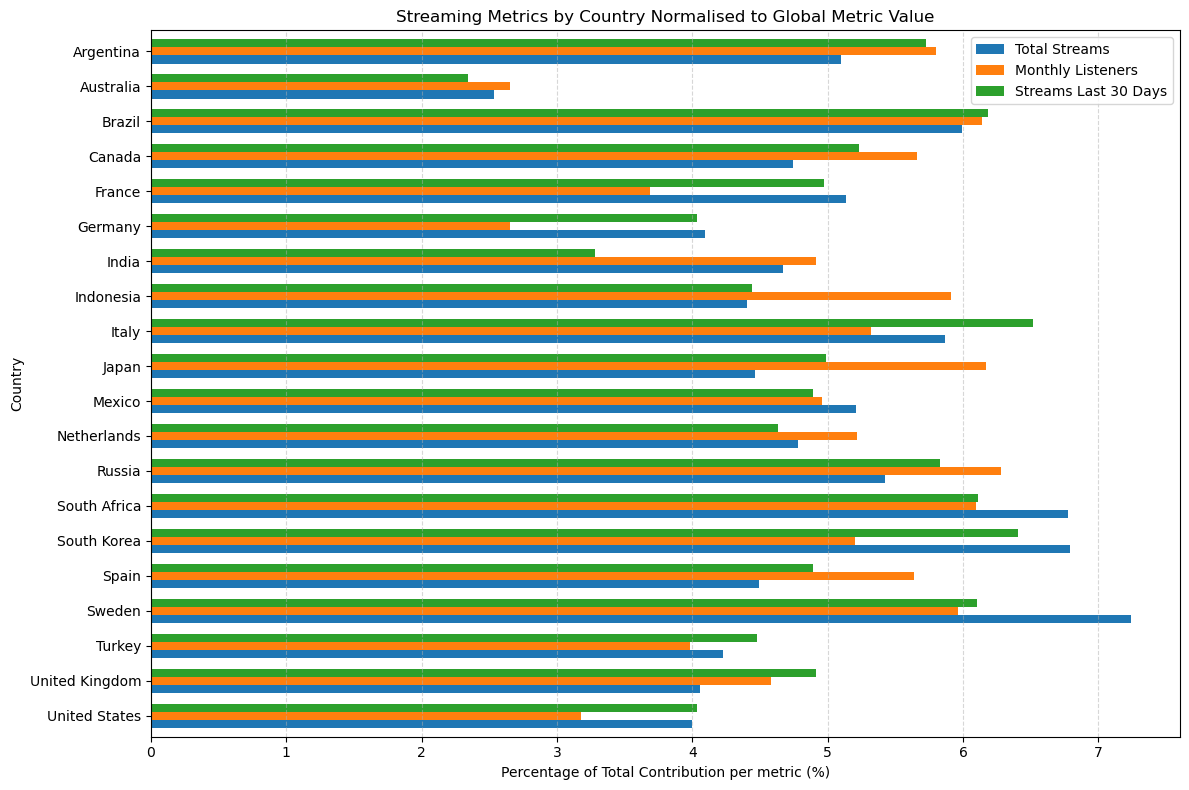

In [24]:
### Normalised country contributions to total streams, monthly listeners, and streams in last 30 days
# group data by these 3 metrics
metrics = ["Total Streams (Millions)", "Monthly Listeners (Millions)", "Streams Last 30 Days (Millions)"]
country_grouped = spotify_data.groupby("Country")[metrics].sum()

# sort values by alphabetical order
country_grouped = country_grouped.sort_values("Country", ascending=False)

# convert each sample to a percentage of their total (only looking for contribution)
country_grouped = country_grouped.divide(country_grouped.sum()) * 100

# plot normalised grouped horizontal bar chart
country_grouped.plot(kind="barh", figsize=(12, 8), width=0.7)
plt.title("Streaming Metrics by Country Normalised to Global Metric Value")
plt.xlabel("Percentage of Total Contribution per metric (%)")
plt.legend(["Total Streams", "Monthly Listeners", "Streams Last 30 Days"])
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

Overall, the country which relatively contributed the most to the total streams of the songs in this data was Sweden, with more than 7% of the contribution. Regarding monthly listeners of these albums, the country with most contribution is Russia with a bit over 6%. Finally, Italy is the country which contributed the most to the streams in the last 30 days, with about 6.5%.
Some interesting patterns can be found in this graph, such as countries contributing much more or much less to a certain metric than to the rest of metrics. There are many examples of these behaviours, but we can focus on the pattern of contributing significantly less to monthly listeners than to the other metrics, since there are many countries (France,  Germany, Italy, South Korea, United States) which follow this pattern. To give an example of a different pattern: the only country which seems to contribute much less to streams in the last 30 days than to the other metrics is India.

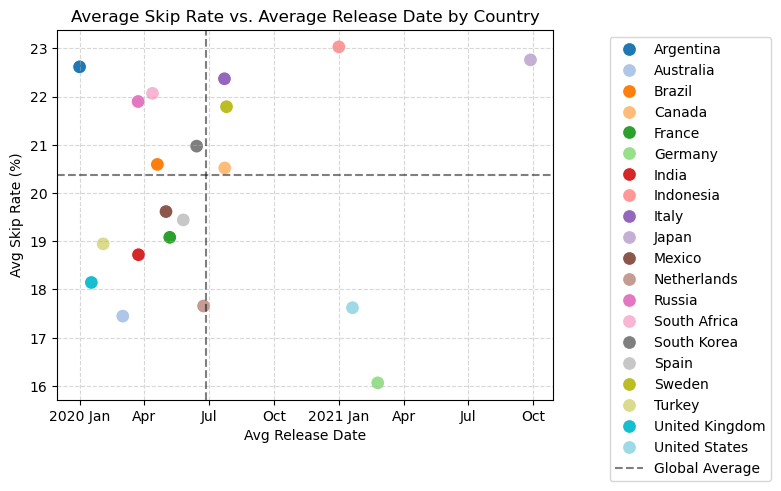

Pearson correlation:  0.1


In [26]:
### Skip rates and release year by country
# Group by country & calculate averages
country_means = spotify_data.groupby("Country")[["Release Year", "Skip Rate (%)"]].mean().reset_index()
# Coloured scatter plot
plt.figure()
sns.scatterplot(data = country_means, x = "Release Year", y = "Skip Rate (%)", hue = "Country", palette = "tab20", s = 100)
plt.axvline(x = spotify_data["Release Year"].mean(), color="black", alpha=0.5, linestyle="--", linewidth=1.5, label="Global Average")
plt.axhline(y = spotify_data["Skip Rate (%)"].mean(), color="black", alpha=0.5, linestyle="--", linewidth=1.5)
ticks = [2020.0, 2020.25, 2020.5, 2020.75, 2021.0, 2021.25, 2021.5, 2021.75]
ticklabels = ["2020 Jan", "Apr", "Jul", "Oct", "2021 Jan", "Apr", "Jul", "Oct"]
plt.xticks(ticks=ticks, labels=ticklabels)
plt.title("Average Skip Rate vs. Average Release Date by Country")
plt.xlabel("Avg Release Date")
plt.ylabel("Avg Skip Rate (%)")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

country_corr = country_means["Release Year"].corr(country_means["Skip Rate (%)"])
print("Pearson correlation: ", round(country_corr,2))

There is a weak correlation between the average skip rate and the average release date for the countries of 0.1, which is not significant. The average skip rate tends to fluctuate around 17-23%. Generally the average release of the songs in the dataset is previous to October 2020, except for 4 countries: Germany and the United States have a relatively low average skip rate (about 16% and 18% respectively), while Indonesia and Japan have a relatively high skip rate (about 23% for both).

#### Artists <a class="anchor" id="EDA_3"></a>
Goal: Investigate how different artists perform across streaming metrics.

Questions:
- Which artists have the highest impact in: total streams, monthly listeners, and hours streamed?
- Is there a relationship between monthly listeners of an artist and their skip rate?

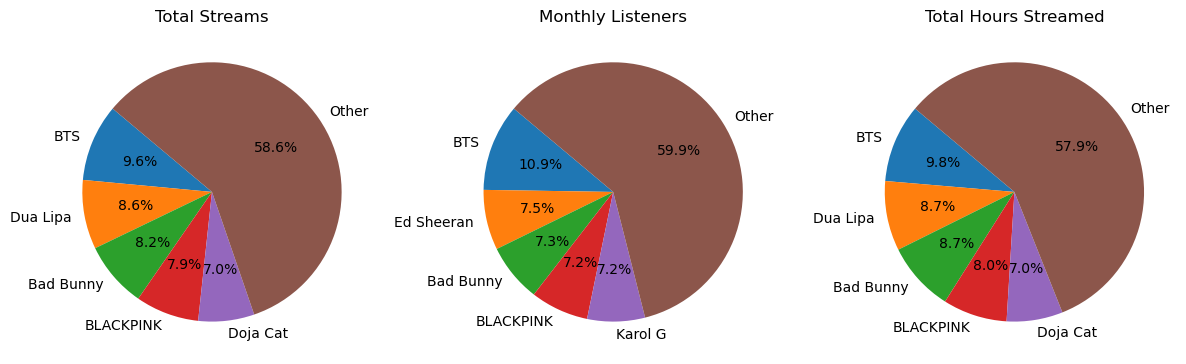

In [29]:
### Top artist by total streams, monthly listeners, and total hours streamed
# prepare metrics, titles, and artist data to loop through
metrics = ["Total Streams (Millions)", "Monthly Listeners (Millions)", "Total Hours Streamed (Millions)"]
titles = ["Total Streams", "Monthly Listeners", "Total Hours Streamed"]
artist_grouped = spotify_data.groupby("Artist")[metrics].sum()

# loop through each metric to plot side-by-side pie charts
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
for i, metric in enumerate(metrics):
    top5 = artist_grouped.sort_values(metric, ascending=False).head(5)
    others = artist_grouped[metric].sum() - top5[metric].sum()
    
    labels = list(top5.index) + ["Other"]
    sizes = list(top5[metric]) + [others]
    
    axs[i].pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
    axs[i].set_title(titles[i])

plt.tight_layout()
plt.show()

Overall, the top 5 artists in each of these three categories amount to about 40-42% of the total in this dataset. The constant rankings for artists in all three categories are: _BTS_ leading, _Bad Bunny_ in third place, and _BLACKPINK_ in fourth place. _Dua Lipa_ is second for total streams and total hours streamed, but does not reach the top 5 for monthly listeners (and viceversa for _Ed Sheeran_, who is second in monthly listeners). Similarly, _Doja Cat_ is fifth for total streams and total hours streamed, but is replaced by _Karol G_ in monthly listeners.

From this, we can discern that _Dua Lipa_ and _Doja Cat_ have more listeners who are "crammers" (listen to many of their songs), while _Ed Sheeran_ and _Karol G_ have more listeners who are constantly listening to them monthly. _BTS_, _Bad Bunny_, and _BLACKPINK_ listeners seem to fall into both of these categories.

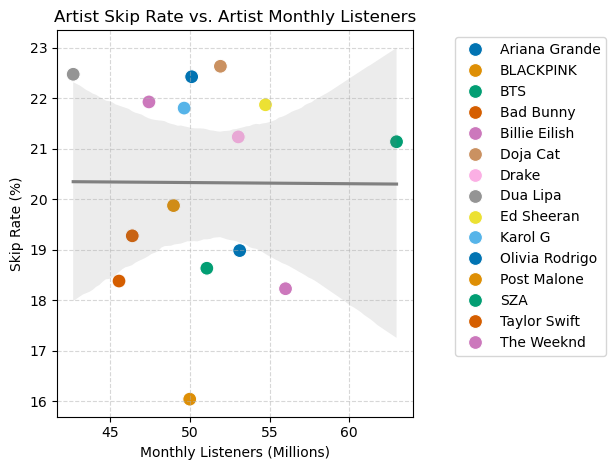

In [31]:
### Artist's monthly listeners and skip rate
# define metrics for artist dataset
artist_metrics = spotify_data.groupby("Artist")[["Monthly Listeners (Millions)", "Skip Rate (%)"]].mean().reset_index()

# plot a scatterplot
plt.figure()
sns.scatterplot(data = artist_metrics, x = "Monthly Listeners (Millions)", y = "Skip Rate (%)", hue = "Artist", s = 100, palette = "colorblind")
# trend line
sns.regplot(data = artist_metrics, x = "Monthly Listeners (Millions)", y = "Skip Rate (%)", scatter = False, color = "grey")
# details
plt.title("Artist Skip Rate vs. Artist Monthly Listeners")
plt.xlabel("Monthly Listeners (Millions)")
plt.ylabel("Skip Rate (%)")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [32]:
### Calculate correlation coefficient
pearson_r = artist_metrics["Monthly Listeners (Millions)"].corr(artist_metrics["Skip Rate (%)"])
print("Pearson correlation coefficient: ", round(pearson_r,2))

# Calculate mean and std dev for skip rate
mean_sr = artist_metrics["Skip Rate (%)"].mean()
std_sr = artist_metrics["Skip Rate (%)"].std()
mean_ml = artist_metrics["Monthly Listeners (Millions)"].mean()
std_ml = artist_metrics["Monthly Listeners (Millions)"].std()

# Define bounds as 2 standard deviations away
lower_sr, upper_sr = mean_sr - 2 * std_sr, mean_sr + 2 * std_sr
lower_ml, upper_ml = mean_ml - 2 * std_ml, mean_ml + 2 * std_ml

# Find outliers
outliers = artist_metrics[
    (artist_metrics["Skip Rate (%)"] < lower_sr) | (artist_metrics["Skip Rate (%)"] > upper_sr) |
    (artist_metrics["Monthly Listeners (Millions)"] < lower_ml) | (artist_metrics["Monthly Listeners (Millions)"] > upper_ml)
]

print("Outliers: \n", outliers)

Pearson correlation coefficient:  -0.01
Outliers: 
       Artist  Monthly Listeners (Millions)  Skip Rate (%)
1  BLACKPINK                     49.977568      16.045135
2        BTS                     62.969318      21.140909


There seems to be no linear relationship between the monthly listeners of an artist and their skip rate (there is a Pearson coefficient of -0.1). There are, however, two outliers in the graph:
- _BLACKPINK_, with an unusually low average skip rate of 16% (the lowest in the dataset, as the rest of data points range between 18%-23%).
- _BTS_, with the highest monthly listener count of 63 million (the rest of the data are between 40 million and 57 million)

Overall, artist popularity (monthly listeners) does not appear to influence skip rate, suggesting that listener engagement may be more genre- or content-driven than purely popularity based.

It is important to note that some of the data may seem contradictory with the previous visualisation (the three pie charts), as _BLACKPINK_ is not fourth in monthly listeners in this graph whereas it was in the previous pie charts. However, this is due to the fact that in this visualisation the calculations use the mean throughout the years, as the goal is to investigate if there is a correlation between the variables, whereas in the previous visualisation the calculations used the sum of the metrics throughout the years, as the investigation was regarding the highest impact throughout time.

#### Platforms <a class="anchor" id="EDA_4"></a>
Goal: Compare user behavior between Free and Premium platforms.

Questions:
- How do stream durations and skip rates differ between platforms?
- What are the average streams per album on each platform?

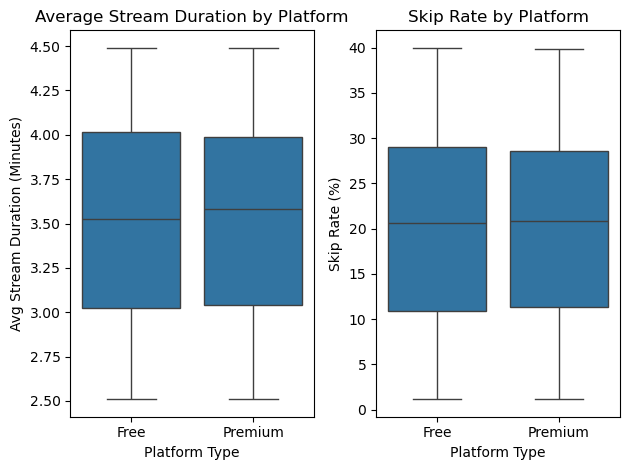

In [35]:
### Stream durations & skip rate between platforms
plt.figure()
# boxplot stream duration
plt.subplot(1,2,1)
sns.boxplot(data = spotify_data, x = "Platform Type", y = "Avg Stream Duration (Min)")
plt.title("Average Stream Duration by Platform")
plt.ylabel("Avg Stream Duration (Minutes)")
# boxplot skip rate
plt.subplot(1,2,2)
sns.boxplot(data = spotify_data, x = "Platform Type", y = "Skip Rate (%)")
plt.title("Skip Rate by Platform")
plt.ylabel("Skip Rate (%)")

plt.tight_layout()
plt.show()

While Premium users display a slightly longer median stream duration compared to Free users, overall on both graphs the differences are small and the distributions are very similar. Platform type does not seem to be a significant factor in stream duration or in skip behaviour. 

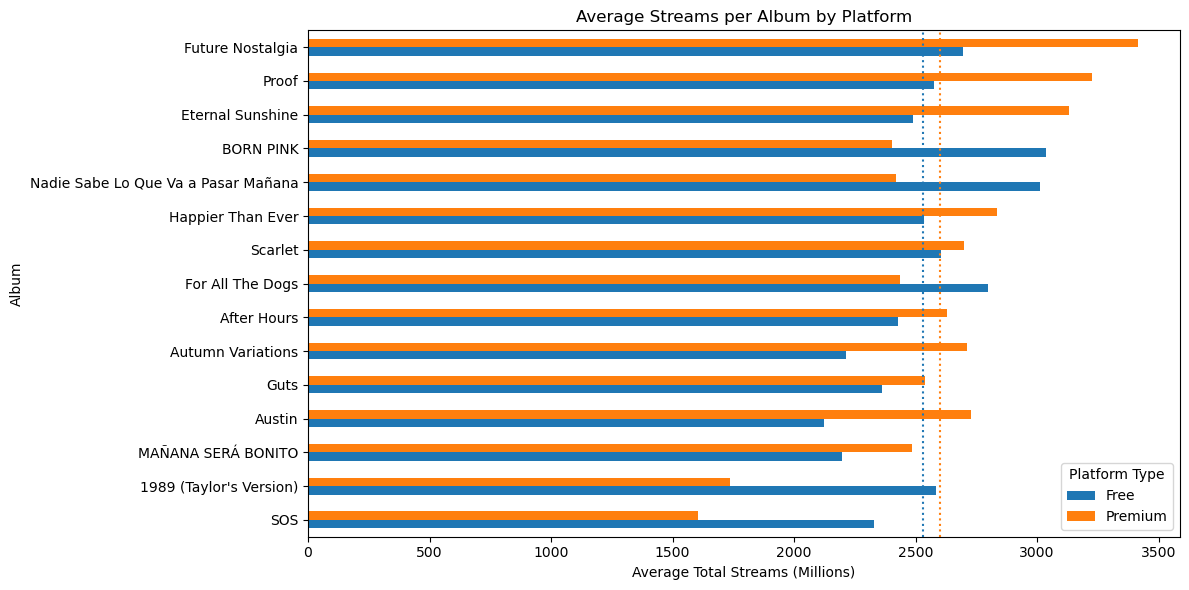

In [37]:
### Avg streams per album on each platform
# group by album and platform type, and calculate average
album_platform = spotify_data.groupby(["Album", "Platform Type"])["Total Streams (Millions)"].mean().reset_index()
# pivot data
album_platform = album_platform.pivot(index = "Album", columns = "Platform Type", values = "Total Streams (Millions)")
# sort by top total streams
total_album_platform = album_platform.sum(axis=1).sort_values()
album_platform = album_platform.loc[total_album_platform.index]
# plot grouped bar chart
album_platform.plot(kind="barh", figsize=(12,6))
plt.title("Average Streams per Album by Platform")
plt.xlabel("Average Total Streams (Millions)")

# plot average stream lines per platform
plt.axvline(album_platform.mean()["Free"], color = "tab:blue", linestyle=":")
plt.axvline(album_platform.mean()["Premium"], color = "tab:orange", linestyle=":")

plt.tight_layout()
plt.show()

The average streams by Premium users is slightly larger than the average streams by Free users, with both being between 2500 million and 2600 million. Overall, there is no clear dominance by either platform and the differences are relatively small for some albums, suggesting platform type may not affect total streaming volume. However, many albums show more noticeable platform preference for Free and for Premium. This can be explored more in depth by calculating the absolute and relative differences and visualising them.

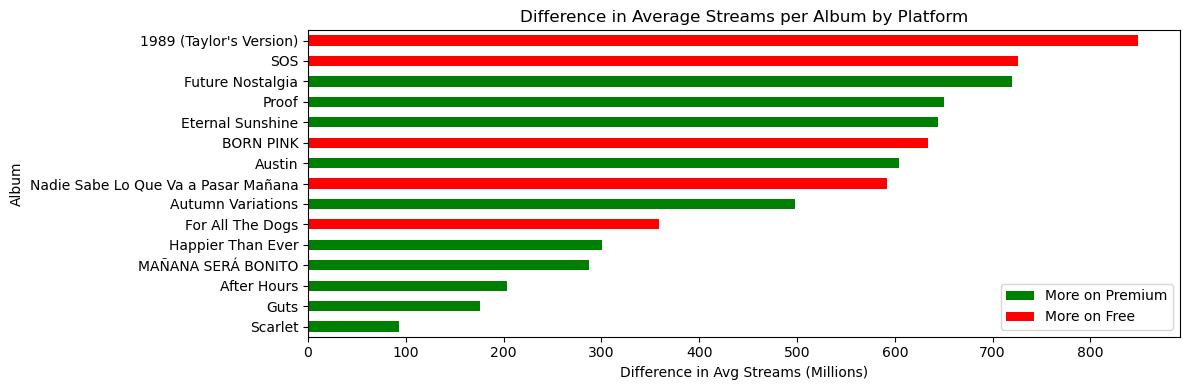

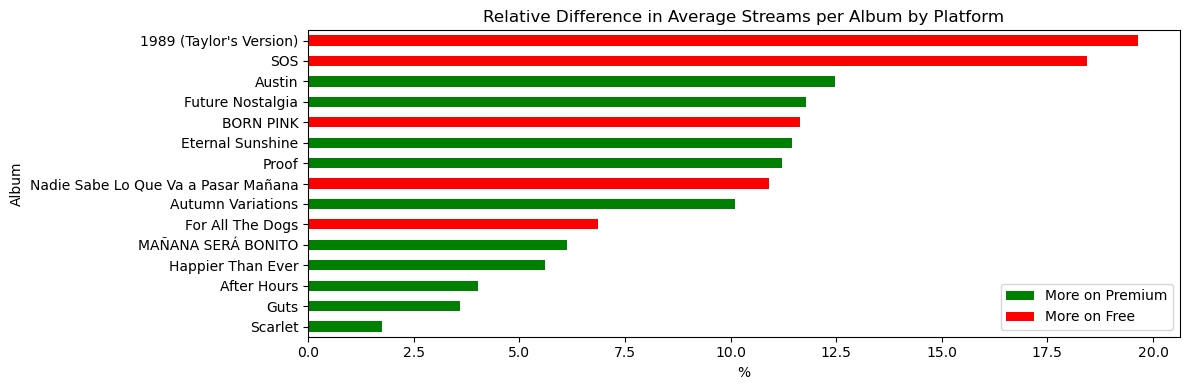

In [39]:
# calculate difference Premium - Free
diff_album_platform = album_platform["Premium"] - album_platform["Free"]
# sort by absolute difference
abs_diff_album_platform = diff_album_platform.abs()
abs_diff_album_platform = abs_diff_album_platform.sort_values()
# assign colours based on sign of difference (positive or negative)
diff_album_platform = diff_album_platform.loc[abs_diff_album_platform.index]
abs_diff_colors = diff_album_platform.apply(lambda x: "green" if x>0 else "red")
# plot bar chart
abs_diff_album_platform.plot(kind = "barh", figsize=(12,4), color=abs_diff_colors)
plt.title("Difference in Average Streams per Album by Platform")
plt.xlabel("Difference in Avg Streams (Millions)")
# plot legend
legend_elements = [
    Patch(facecolor = "green", label = "More on Premium"),
    Patch(facecolor = "red", label = "More on Free")
]
plt.legend(handles = legend_elements)

plt.tight_layout()
plt.show()

# calculate & sort percentage difference
perc_diff_album_platform = (abs_diff_album_platform / total_album_platform) * 100
perc_diff_album_platform = perc_diff_album_platform.sort_values()
# assign colours based on sign of percentage difference (positive or negative)
diff_album_platform = diff_album_platform.loc[perc_diff_album_platform.index]
perc_diff_colors = diff_album_platform.apply(lambda x: "green" if x>0 else "red")
# plot bar chart & legend
perc_diff_album_platform.plot(kind="barh", figsize=(12,4), color=perc_diff_colors)
plt.title("Relative Difference in Average Streams per Album by Platform")
plt.xlabel("%")
plt.legend(handles = legend_elements)

plt.tight_layout()
plt.show()

With these two graphs it is visible that platform bias is gernerally modest, with albums generally having about a 10% difference in platform streaming with respect to the total streaming. Albums like _1989 (Taylor's Version)_ and _SOS_ have the largest absolute and relative preference by Free users, whereas _Future Nostalgia_ leads on absolute preference for Premium and is close to the leading _Austin_ for relative preference in Premium.

Altogether, it seems that some albums have clear platform performance, albeit most differences are small relative to total streams, and Free users dominated a couple of top albums more strongly than Premium users.

#### Genres <a class="anchor" id="EDA_5"></a>
Goal: Identify behavioural trends patterns across music genres.

Questions:
- Which genres are currently most streamed globally (total and by country)?
- How do stream durations and skip rates differ across genres?

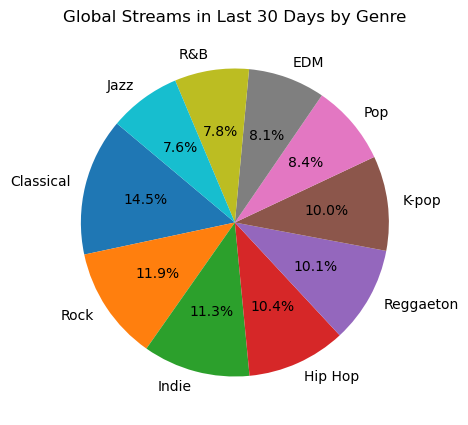

Total Global Streams in Last 30 Days:  49524  Million


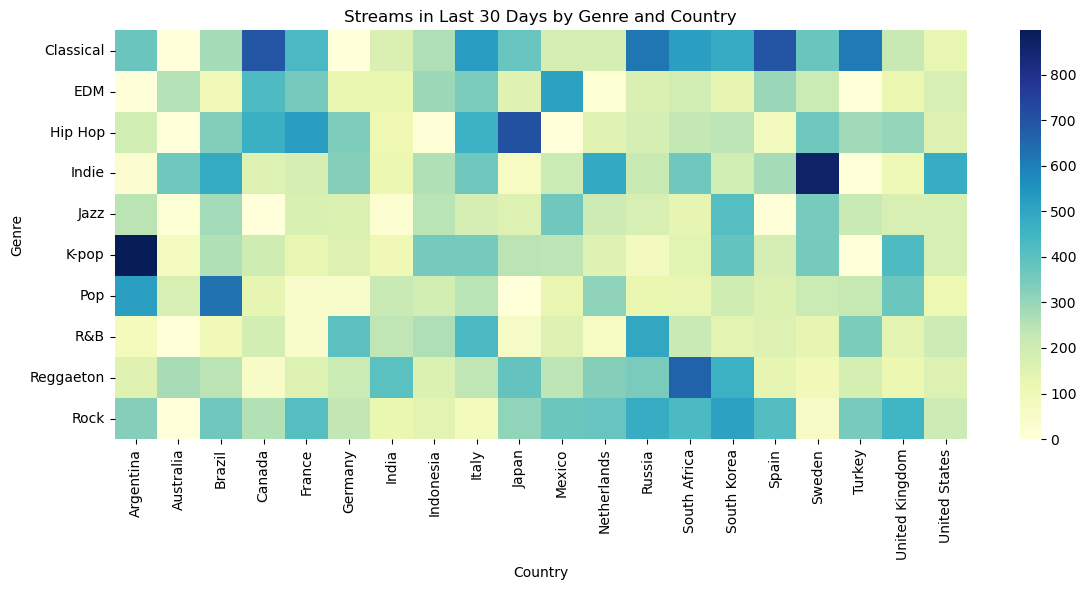

In [42]:
### Global streams last 30 days per genre
# group, sum, and sort data
genre_global = spotify_data.groupby("Genre")["Streams Last 30 Days (Millions)"].sum()
genre_global = genre_global.sort_values(ascending=False)
# prepare pie chart wedges labels and sizes
labels = list(genre_global.index)
sizes = list(genre_global.values)
# plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Global Streams in Last 30 Days by Genre")

plt.show()

# print total global streams in last 30 days
print("Total Global Streams in Last 30 Days: ", int(spotify_data["Streams Last 30 Days (Millions)"].sum()), " Million")

### Streams last 30 days per genre per country
# group, sum, and clean data
genre_country = spotify_data.groupby(["Genre", "Country"])["Streams Last 30 Days (Millions)"].sum().unstack().fillna(0)
# plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(genre_country, cmap="YlGnBu")
plt.title("Streams in Last 30 Days by Genre and Country")
plt.xlabel("Country")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()

It is clear from the pie chart that Classical music leads globally with 14.5% of total streams, followed by Rock, Indie, and Hip Hop (10%-12% each). The distribution is fairly balanced between genres with no outliers, since each genre accounts for more than 7.5% (if the genres were perfectly distributed, each would account for 10%). This seems to suggest a wide global appeal across mainstream and culturally distinct music genres.

As for the analysis of recent music consumption of genres by country, Classical and Rock are the music genres which perform the most consistently across countries, with the top Classical consumers being Spain and Canada, and with the top Rock consumers being South Korea and Russia. However, genre preferences significantly vary by country, with the most distinct preferences being: K-pop in Argentina, Indie in Sweden, Hip Hop in Japan, Reggaeton in South Africa, and Pop in Brazil. These patterns reveal notable regional variation in current streaming behaviour.

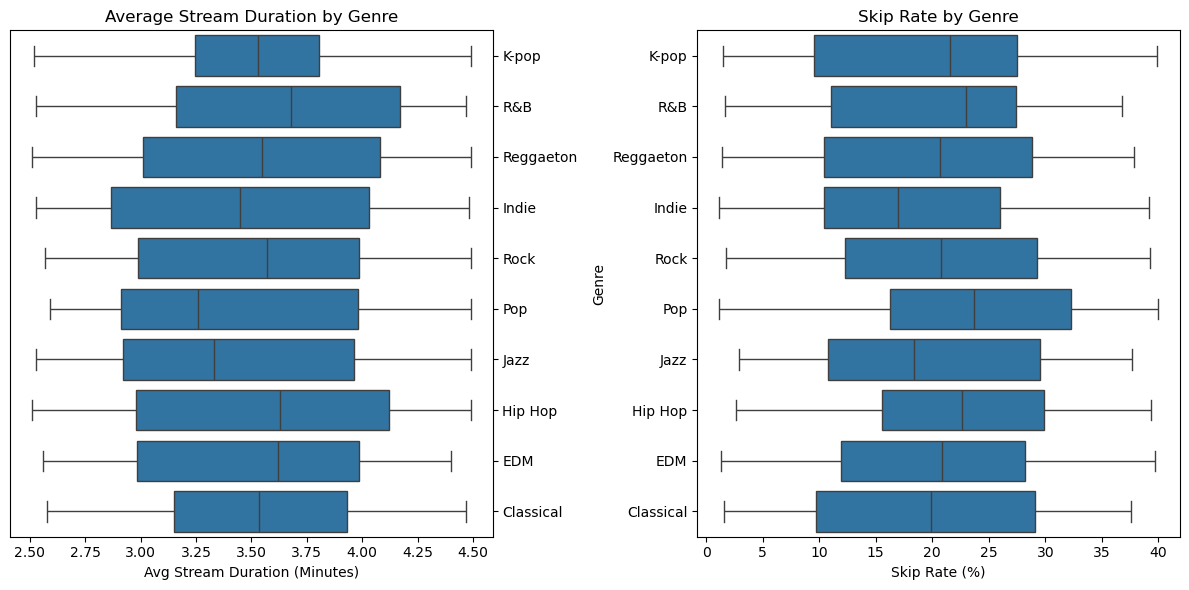

In [44]:
### Avg stream durations & skip rates by genre
# prepare for subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Boxplots 1: Avg stream duration by genre
sns.boxplot(data=spotify_data, x="Avg Stream Duration (Min)", y="Genre", ax=axes[0])
axes[0].set_title("Average Stream Duration by Genre")
axes[0].yaxis.tick_right() # Move genres to be shared between plots
axes[0].set_ylabel("") # Remove "Genre" label
axes[0].set_xlabel("Avg Stream Duration (Minutes)")

# Boxplots 2: Skip rate by genre
sns.boxplot(data=spotify_data, x="Skip Rate (%)", y="Genre", ax=axes[1])
axes[1].set_title("Skip Rate by Genre")
axes[1].set_xlabel("Skip Rate (%)")

plt.tight_layout()
plt.show()

The boxplots show that both average stream duration and skip rate vary somewhat by genre, but not drastically. The range for both metrics of the genres seems to be somewhat the same, with differences only being noticeable in their medians and some distributions. The only noticeable outlier in the boxplots regarding spread is the one for K-pop, which seems to have the least spread of stream duration. Regarding the medians, R&B, Hip-Hop, and EDM seem to have the longest stream durations, whereas Pop and Jazz seem to have the shortest. Similarly, using the medians of the boxplots to the right, Pop, R&B, and Hip Hop seem to have the largest skip rates, while Indie and Jazz seem to have the lowest. These observations raise the question: is there a relationship between the average stream duration of a genre and how often it is skipped?

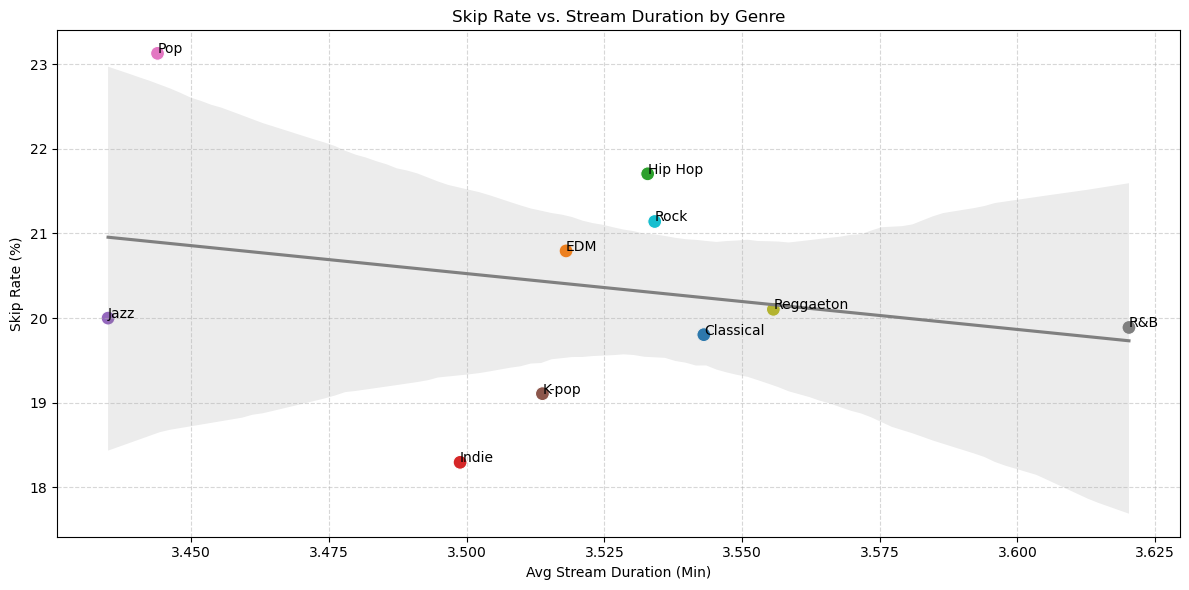

In [46]:
### Skip rate vs steam duration by genre
# group data & calculate averages
genre_means = spotify_data.groupby("Genre")[["Avg Stream Duration (Min)", "Skip Rate (%)"]].mean().reset_index()
# scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=genre_means, x="Avg Stream Duration (Min)", y="Skip Rate (%)", hue="Genre", s=100)
# show genre label for each data point
for i, row in genre_means.iterrows():
    plt.text(row["Avg Stream Duration (Min)"], row["Skip Rate (%)"], row["Genre"], fontsize=10)

# trend line
sns.regplot(data = genre_means, x = "Avg Stream Duration (Min)", y = "Skip Rate (%)", scatter = False, color = "grey")

# make pretty and plot
plt.title("Skip Rate vs. Stream Duration by Genre")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

In [47]:
### Calculate correlation coefficient
pearson_r = genre_means["Avg Stream Duration (Min)"].corr(genre_means["Skip Rate (%)"])
print("Pearson correlation coefficient: ", round(pearson_r,2))

# Calculate mean and std dev for metrics
mean_sr = genre_means["Skip Rate (%)"].mean()
std_sr = genre_means["Skip Rate (%)"].std()
mean_asd = genre_means["Avg Stream Duration (Min)"].mean()
std_asd = genre_means["Avg Stream Duration (Min)"].std()

# Define bounds as 2 standard deviations away
lower_sr, upper_sr = mean_sr - 2 * std_sr, mean_sr + 2 * std_sr
lower_asd, upper_asd = mean_asd - 2 * std_asd, mean_asd + 2 * std_asd

# Find outliers
outliers = genre_means[
    (genre_means["Skip Rate (%)"] < lower_sr) | (genre_means["Skip Rate (%)"] > upper_sr) |
    (genre_means["Avg Stream Duration (Min)"] < lower_asd) | (genre_means["Avg Stream Duration (Min)"] > upper_asd)
]

print("Outliers: \n", outliers)

Pearson correlation coefficient:  -0.26
Outliers: 
 Empty DataFrame
Columns: [Genre, Avg Stream Duration (Min), Skip Rate (%)]
Index: []


Despite there not being much variability (axes are very "zoomed in"), plotting both metrics reveals a slight pattern: genres with shorter average stream durations (such as Pop and Jazz), generally tend to be skipped more often. This weak negative correlation is backed by the Pearson correlation coefficient of -0.26, but it is very weak, which can explain why Jazz is shown as having the shortest average stream duration, but also having a low skip rate. There are no outliers, since the correlation is weak, but there are data points which do not fit the general trend line:
- Indie and K-pop, with strong engagement (lowest skip rates and relatively low durations)
- Hip Hop and Rock, somewhat average duration but skipped more often than others.
- Pop, with an unusually high skip rate and low average duration.

Although the overall correlation is weak, genre-specific behaviours stand out.

### Conclusion <a class="anchor" id="conclusion"></a>
#### Findings Overview
The top five artists in this dataset account for around 40% of the total activity, demonstrating a strong skew in global popularity within the top 500 songs. BTS leads across total streams, monthly listeners, and hours streamed, as well as having the album with the most total streams. Notably, artists like Dua Lipa and Doja Cat appear in the top five for total streams and hours streamed, but not monthly listeners, indicating highly engaged fanbases that listen repeatedly. In contrast, Ed Sheeran and Karol G appear in the top five for monthly listeners but not in the other metrics, suggesting broader but more casual audiences.

No linear correlation was found between skip rate and monthly listeners overall, but BLACKPINK stands out for having the lowest skip rate (16%), suggesting unusually high listener retention. Moreover, weak correlation was found between stream duration and skip rate in genres, with the least skipped genres being Indie and K-pop

Genre-based analysis, restricted to streams from the last 30 days, revealed that Classical music had the highest average streams per song, followed by Rock and Indie. The data also showed that multiple genres performed disproportionately well in certain countries, reflecting strong regional differences in musical taste.

Regarding platform behavior, while skip rates and stream durations were similar across Free and Premium users, a difference was observed in total streams per album: most albums received higher stream counts on Premium, pointing to a potential strategic advantage for artists in targeting Premium user engagement. Furthermore, the albums with the highest platform bias tended to have more Free users than Premium users, such as _1989 (Taylor's Version)_, suggesting reduced functionalities for Free users reduces their streaming diversity.

#### Next Steps
This dataset allows for further statistical analysis, possibly with more data quantity and granularity. Future tasks could include:
- Time-frame expansion by using full-year streaming data instead of simply total throughout some years and last 30 days.
- Quantification of seasonality or anomalies in genre trends.
- Disaggregation by country to identify localised genre preferences more precisely.
- Bias investigation in the top 500 dataset with statistical testing to strengthen claims.